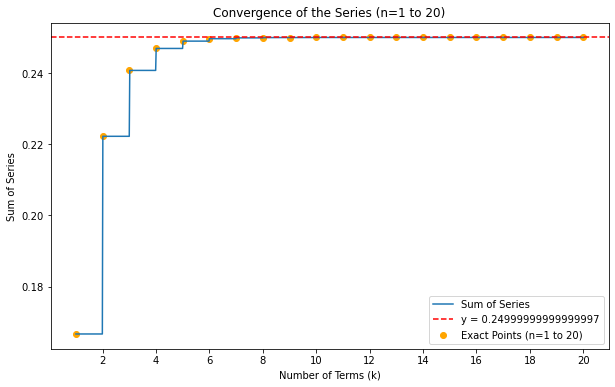

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Define the function to be plotted
def series_sum(k):
    n = np.arange(1, k+1)
    return np.sum(1/6 * (1/3)**(n-1))

# Calculate the exact sum of the series for a large k to find where it converges
a = 1/6
r = 1/3
convergence_value = a / (1 - r)

# Define fine k_values between 1 and 20 and calculate the sum for those points
k_values_focused = np.linspace(1, 20, 1000)  # 1000 points between 1 and 20 for smoothness
sum_values_focused = [series_sum(int(k)) for k in k_values_focused]

# Define exact points for n=1,2,3,...,20 and calculate their respective sums
exact_k_values = np.arange(1, 21)  # exact points from 1 to 20
exact_sum_values = [series_sum(k) for k in exact_k_values]

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(k_values_focused, sum_values_focused, label='Sum of Series')
plt.scatter(exact_k_values, exact_sum_values, color='orange', label='Exact Points (n=1 to 20)')

# Draw a horizontal line at y=convergence_value, which is where the function actually converges
plt.axhline(y=convergence_value, color='r', linestyle='--', label=f'y = {convergence_value}')

# Add titles and labels
plt.title('Convergence of the Series (n=1 to 20)')
plt.xlabel('Number of Terms (k)')
plt.ylabel('Sum of Series')

# Set x-axis ticks to even numbers only
plt.xticks(np.arange(2, 21, 2))

# Show legend
plt.legend()

# Display the plot
plt.show()


In [3]:
###new strategy formation

In [4]:
import random
# Function to play the game with the updated winning condition
def play_game():
    glasses = [0] * 8  # Start with all glasses empty
    sequence = []

    for round_number in range(8):  # Play up to 8 rounds
        # Ali's turn: choose how many glasses to pour into
        glasses_in_play = [i for i, v in enumerate(glasses) if v > 0] or list(range(8))
        k = random.randint(1, len(glasses_in_play))
        chosen_glasses = random.sample(glasses_in_play, k)
        amount_to_pour = 0.5 / k

        # Pour water into glasses
        for g in chosen_glasses:
            glasses[g] += amount_to_pour

        # Record Ali's move
        sequence.append(('Ali', chosen_glasses, [glasses[g] for g in chosen_glasses]))

        # Check if Ali has won after pouring
        if sum(1 for amount in glasses if amount > 0.25) >= 2:
            return sequence, True

        # Beth's turn: choose a glass to empty
        glass_to_empty = random.choice(chosen_glasses) if chosen_glasses else None
        if glass_to_empty is not None:
            glasses[glass_to_empty] = 0
            sequence.append(('Beth', [glass_to_empty], []))

        # Check if game over because Beth emptied the last glass
        if not any(glasses):  # All glasses are empty
            return sequence, False

    # Ali didn't win in 8 rounds, game over
    return sequence, False

# Function to display the sequence in a readable format
def display_sequence(sequence):
    for i, (player, action, glasses) in enumerate(sequence):
        if player == 'Ali':
            glasses_status = ', '.join([f"G{g+1}: {amt:.2f} pints" for g, amt in zip(action, glasses)])
            print(f"Round {i//2 + 1} - Ali pours into glasses {', '.join(['G' + str(g+1) for g in action])}: [{glasses_status}]")
        else:
            print(f"Round {i//2 + 1} - Beth empties glass G{action[0]+1}.")

# Main simulation loop
winning_sequence = None
attempt = 0

# Keep playing until Ali wins
while not winning_sequence:
    attempt += 1
    sequence, ali_won = play_game()
    if ali_won:
        winning_sequence = sequence
        break

# Output the winning sequence
if winning_sequence:
    print(f"Ali won after {attempt} attempt(s). Here is the winning sequence:")
    display_sequence(winning_sequence)
else:
    print("Ali could not win in the given attempts.")


Ali won after 1 attempt(s). Here is the winning sequence:
Round 1 - Ali pours into glasses G3, G6, G7: [G3: 0.17 pints, G6: 0.17 pints, G7: 0.17 pints]
Round 1 - Beth empties glass G3.
Round 2 - Ali pours into glasses G6, G7: [G6: 0.42 pints, G7: 0.42 pints]


In [ ]:
###n>6

In [2]:
import random

def simulate_game(n):
    # Initialize all glasses as empty
    glasses = [0] * n
    
    # Ali's first move: fill three random glasses with 1/6 pint
    glasses_to_fill = random.sample(range(n), 3)
    for g in glasses_to_fill:
        glasses[g] = 1/6

    # Beth's move: empty one of the glasses
    glass_to_empty = random.choice(glasses_to_fill)
    glasses[glass_to_empty] = 0

    # Ali's second move: add 1/4 pint to the remaining two filled glasses
    for g in glasses_to_fill:
        if glasses[g] != 0:  # Check if the glass wasn't emptied by Beth
            glasses[g] += 1/4

    # Check if Ali wins (at least two glasses have more than 1/6 pint)
    return sum(g > 1/6 for g in glasses) >= 2

# Run 100 simulations with random 'n' between 6 and 40
def simulate_n_games(num_simulations=100):
    wins = 0
    for _ in range(num_simulations):
        n = random.randint(6, 40)
        if simulate_game(n):
            wins += 1
    return wins

# Run the simulations and print the number of wins for Ali
num_wins = simulate_n_games()
print(f"Ali wins {num_wins} out of 100 simulations.")




Ali wins 100 out of 100 simulations.
